# Disney Movies & Box Office Success

<p>Walt Disney Studios is the foundation on which The Walt Disney Company was built. The Studios has produced more than 600 films since their debut film,  Snow White and the Seven Dwarfs in 1937. While many of its films were big hits, some of them were not. In this notebook, I'll will explore a dataset of Disney movies and analyze what contributes to the success of Disney movies.</p>

<p>First, I'll take a look at the Disney data compiled by <a href="https://data.world/kgarrett/disney-character-success-00-16">Kelly Garrett</a>. The data contains 579 Disney movies with six features: movie title, release date, genre, MPAA rating, total gross, and inflation-adjusted gross. </p>


In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Read the file
gross = pd.read_csv('datasets/disney_movies_total_gross.csv' , parse_dates=['release_date'])

# Take a look at the first few rows
gross.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730



<p>I'll start by exploring the data. I'll check which are the 10 Disney movies that have earned the most at the box office. To do this I'll sort movies by their inflation-adjusted gross (we will call it adjusted gross from this point onward). </p>

In [2]:
# Sort data by the adjusted gross in descending order
inflation_adjusted_gross_desc = gross.sort_values(by='inflation_adjusted_gross' , ascending=False)

# Display the top 10 movies 
inflation_adjusted_gross_desc.head(10)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


<p>From the top 10 movies above, it seems that some genres are more popular than others. So, I'll check which genres are growing stronger in popularity. To do this, I will group movies by genre and then by year to see the adjusted gross of each genre in each year.</p>

In [3]:
 # Extract year from release_date and store it in a new column
gross['release_year'] = pd.DatetimeIndex(gross['release_date']).year

# Compute mean of adjusted gross per genre and per year
group = gross.groupby(['genre' , 'release_year']).mean()

# Convert the GroupBy object to a DataFrame
genre_yearly = group.reset_index()

# Inspect genre_yearly 
genre_yearly.head(10)

C:\Users\18324\AppData\Local\Temp\ipykernel_15408\3844456906.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = gross.groupby(['genre' , 'release_year']).mean()


,genre,release_year,total_gross,inflation_adjusted_gross
0,Action,1981,0.0,0.0
1,Action,1982,26918576.0,77184895.0
2,Action,1988,17577696.0,36053517.0
3,Action,1990,59249588.5,118358772.0
4,Action,1991,28924936.5,57918572.5
5,Action,1992,29028000.0,58965304.0
6,Action,1993,21943553.5,44682157.0
7,Action,1994,19180582.0,39545796.0
8,Action,1995,63037553.5,122162426.5
9,Action,1996,135281096.0,257755262.5



<p>I'll make a plot out of these means of groups to better see how box office revenues have changed over time.</p>

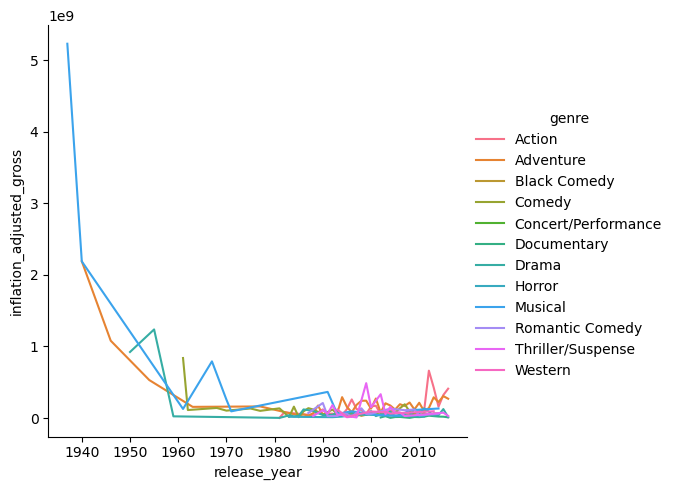

In [4]:
# Plot the data  
sns.relplot(x='release_year', y='inflation_adjusted_gross', kind='line', hue='genre',data=genre_yearly)  

<p>The line plot supports our belief that some genres are growing faster in popularity than others. For Disney movies, Action and Adventure genres are growing the fastest. 

<p>Next, I'll will build a linear regression model to understand the relationship between genre and box office gross. </p>

<p>Since linear regression requires numerical variables and the genre variable is a categorical variable, I'll use  one-hot encoding to convert the categorical variables to numerical.</p>

<p>For this dataset, there is 11 dummy variables, one for each genre except the action genre which I use as a baseline. For example, if a movie is an adventure movie, like The Lion King, the adventure variable will be 1 and other dummy variables will be 0. Since the action genre is our baseline, if a movie is an action movie, such as The Avengers, all dummy variables will be 0.</p>

In [5]:
# Convert genre variable to dummy variables 
genre_dummies =  pd.get_dummies(data=gross['genre'], drop_first=True)
genre_dummies.head()

,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Musical,Romantic Comedy,Thriller/Suspense,Western
0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0



<p>Now that I have my dummy variables, I can build a linear regression model to predict the adjusted gross using these dummy variables.</p>

<p>From the regression model, I check the effect of each genre by looking at its coefficient given in units of box office gross dollars. I focus on the impact of action and adventure genres here. I expect that movies like the Lion King or Star Wars would perform better for box office.</p>

In [6]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Build a linear regression model
regr = LinearRegression()  

# Fit regr to the dataset
regr.fit(genre_dummies, gross['inflation_adjusted_gross'])

# Get estimated intercept and coefficient values 
action = regr.intercept_
adventure = regr.coef_[[0]][0]

# Inspect the estimated intercept and coefficient values 
print((action, adventure))

(102921757.36842084, 87475654.70909858)


<p>Next, I compute 95% confidence intervals for the intercept and coefficients.

<p>I calculated the confidence intervals using the pairs bootstrap method. </p>

In [7]:
# Create an array of indices to sample from 
inds = np.arange(len(gross['genre']))

# Initialize 500 replicate arrays
size = 500
bs_action_reps =  np.empty(size)
bs_adventure_reps =  np.empty(size)

<p>After the initialization, I perform pair bootstrap estimates for the regression parameters. Note that I will draw a sample from a set of (genre, adjusted gross) data where the genre is the original genre variable. Then I will perform one-hot encoding after that. </p>

In [8]:
# Generate replicates  
for i in range(size):
    
    # Resample the indices 
    bs_inds = np.random.choice(inds, size=len(inds))
        
    # Get the sampled genre and sampled adjusted gross
    bs_genre = gross['genre'][bs_inds]
    bs_gross = gross['inflation_adjusted_gross'][bs_inds]
    
    # Convert sampled genre to dummy variables
    bs_dummies = pd.get_dummies(bs_genre, drop_first=True)  
    
    # Build and fit a regression model 
    regr = LinearRegression().fit(bs_dummies, bs_gross)
    
    # Compute replicates of estimated intercept and coefficient
    bs_action_reps[i] = regr.intercept_
    bs_adventure_reps[i] = regr.coef_[[0]][0]
        

<p>Finally, I compute 95% confidence intervals for the intercept and coefficient and examine if they exclude 0. If one of them (or both) does, then it is unlikely that the value is 0 and we can conclude that there is a significant relationship between that genre and the adjusted gross. </p>

In [9]:
# Compute 95% confidence intervals for intercept and coefficient values
confidence_interval_action = np.percentile(bs_action_reps, [2.5, 97.5])
confidence_interval_adventure = np.percentile(bs_adventure_reps, [2.5, 97.5])

# Inspect the confidence intervals
print(confidence_interval_action)
print(confidence_interval_adventure)

[7.30319218e+07 1.39080763e+08]
[3.39885688e+07 1.46998230e+08]
